In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tradingcore.execution_manager import ExecutionManager
from tradingcore.campaign import Campaign
from tradingcore.account import Account
from tradingcore.moneymanagement import PlainMM

from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.datasource_sql import DataSourceSQL
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage

import pprint

In [3]:
try:
    from .settings import *
except SystemError:
    from scripts.settings import *

try:
    from .settings_local import *
except SystemError:
    try:
        from scripts.settings_local import *
    except ImportError:
        pass
    pass

In [4]:
assetindex = AssetIndexMongo(MONGO_CONNSTR, MONGO_EXO_DB)
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
#datasource = DataSourceSQL(SQL_HOST, SQL_USER, SQL_PASS, assetindex, futures_limit=10, options_limit=10)
datasource = DataSourceMongo(MONGO_CONNSTR, MONGO_EXO_DB, assetindex, futures_limit=10, options_limit=10, exostorage=storage)


In [5]:
exmgr = ExecutionManager(MONGO_CONNSTR, datasource, dbname=MONGO_EXO_DB)

In [6]:
campaigns = exmgr.campaign_load_all()
accounts = exmgr.account_load_all()
pp = pprint.PrettyPrinter(indent=4)

## List of available campaigns

In [7]:
[print(x) for x in campaigns.keys()];

ZW_Bear
NG_Bidirectional
NG_Bull
NG_Bear
test_campaign
ES_Bull
ZC_Bear
ES_Bear
CL_Bear
ZS_Bear
ZW_Bull
ZN_Bull
CL_Bullish
CL_Bull
CL_Bidirectional
CL_Sample
ZS_Bull
ZN_Bear


In [8]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'BollingerBands',
                  'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'Quandl-EXO-CL-CallSpread',
                     'SMART',
                     'SmartEXO',
                     'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


# Alphas list

In [9]:
instruments_filter = ['ES']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

[print(s) for s in sorted(swmdf.columns)];

ES_BearishCollarBW_Long_EXO
ES_BearishCollarBW_Short_EXO
ES_BullishCollarBW_Long_EXO
ES_BullishCollarBW_Short_EXO
ES_CallSpread_Long_EXO
ES_CallSpread_Long_SwingPoint
ES_CallSpread_Long_SwingPoint_bullish-custom
ES_CallSpread_Short_EXO
ES_CallSpread_Short_IchimokuCloud
ES_CallSpread_Short_IchimokuCloud_bearish-custom
ES_CallSpread_Short_MACross
ES_CallSpread_Short_MACross_bearish-custom
ES_ContFut_Long_EXO
ES_ContFut_Short_EXO
ES_PutSpread_Long_BollingerBands_bearish-custom
ES_PutSpread_Long_BolllingerBands
ES_PutSpread_Long_BolllingerBands_bearish-custom
ES_PutSpread_Long_EXO
ES_PutSpread_Long_IchimokuCloud
ES_PutSpread_Long_IchimokuCloud_bearish-custom
ES_PutSpread_Long_SwingPoint
ES_PutSpread_Long_SwingPoint_bearish-custom
ES_PutSpread_Short_BollingerBands_bullish-custom
ES_PutSpread_Short_BolllingerBands
ES_PutSpread_Short_BolllingerBands_bullish-custom
ES_PutSpread_Short_EXO
ES_PutSpread_Short_IchimokuCloud
ES_PutSpread_Short_IchimokuCloud_alt2-bullish-custom
ES_PutSpread_Short_Ic

In [10]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ZS*'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
ZS_BearishCollarBW
ZS_BullishCollarBW
ZS_CallSpread
ZS_ContFut
ZS_PutSpread
ZS_SMART_Ichimoku_Long
ZS_SmartEXO_Bullish_Ichi_Short_Put_Spread_150Delta_Bi
ZS_SmartEXO_Ichi_Call_Spread_150Delta_Bi
ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi
ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral
==== Alphas EXO list
ES_BearishCollarBW_Long_EXO
ES_BearishCollarBW_Short_EXO
ES_BullishCollarBW_Long_EXO
ES_BullishCollarBW_Short_EXO
ES_CallSpread_Long_EXO
ES_CallSpread_Long_SwingPoint
ES_CallSpread_Long_SwingPoint_bullish-custom
ES_CallSpread_Short_EXO
ES_CallSpread_Short_IchimokuCloud
ES_CallSpread_Short_IchimokuCloud_bearish-custom
ES_CallSpread_Short_MACross
ES_CallSpread_Short_MACross_bearish-custom
ES_ContFut_Long_EXO
ES_ContFut_Short_EXO
ES_PutSpread_Long_BollingerBands_bearish-custom
ES_PutSpread_Long_BolllingerBands
ES_PutSpread_Long_BolllingerBands_bearish-custom
ES_PutSpread_Long_EXO
ES_PutSpread_Long_IchimokuCloud
ES_PutSpread_Long_IchimokuCloud_bearish-custom
ES_PutSpr

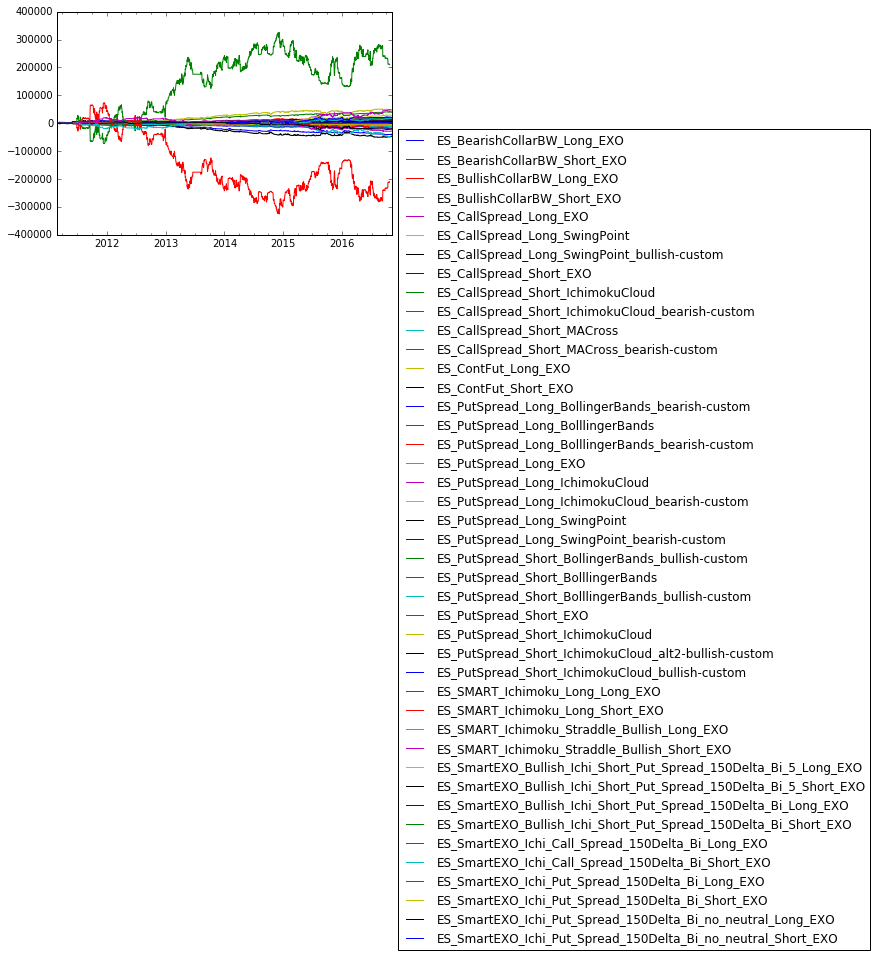

In [11]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

# Campaign composition

In [12]:
 campaign_dict = {
            'name': 'ES_Bidirectional',
            'description': 'Bidirectional Expression of the S&P500',
            'alphas': {
            
                'ES_CallSpread_Short_IchimokuCloud_bearish-custom': {
                    'qty': 1.0,
                    },
                'ES_CallSpread_Short_MACross_bearish-custom': {
                        'qty': 1.0,
                    },
                'ES_PutSpread_Long_BolllingerBands_bearish-custom': {
                        'qty': 1.0,
                    },
                 'ES_PutSpread_Long_IchimokuCloud_bearish-custom': {
                        'qty': 1.0,
                    },
                 'ES_PutSpread_Long_SwingPoint_bearish-custom': {
                        'qty': 1.0,
                    },
                 'ES_PutSpread_Short_IchimokuCloud_bullish-custom': {
                        'qty': 1.0,
                    },
            
                'ES_CallSpread_Long_SwingPoint_bullish-custom': {
                    'qty': 1.0,
                    },
                'ES_PutSpread_Long_SwingPoint_bearish-custom': {
                        'qty': 1.0,
                    },
                'ES_PutSpread_Short_BolllingerBands_bullish-custom': {
                        'qty': 1.0,
                    },
                 'ES_PutSpread_Short_IchimokuCloud_alt2-bullish-custom': {
                        'qty': 1.0,
                    },
                 'ES_PutSpread_Short_IchimokuCloud_bullish-custom': {
                        'qty': 1.0,
                    },
            }
        }

In [13]:
cmp = Campaign(campaign_dict, datasource)

### Save campaign

In [14]:
exmgr.campaign_save(cmp)

## Campaign positions

### Alphas positions

In [15]:
pp.pprint(cmp.alphas_positions)

{   'ES_CallSpread_Long_SwingPoint_bullish-custom': {   'exo_name': 'ES_CallSpread',
                                                        'exposure': 1.0,
                                                        'prev_exposure': 1.0},
    'ES_CallSpread_Short_IchimokuCloud_bearish-custom': {   'exo_name': 'ES_CallSpread',
                                                            'exposure': 0.0,
                                                            'prev_exposure': 0.0},
    'ES_CallSpread_Short_MACross_bearish-custom': {   'exo_name': 'ES_CallSpread',
                                                      'exposure': -1.0,
                                                      'prev_exposure': -1.0},
    'ES_PutSpread_Long_BolllingerBands_bearish-custom': {   'exo_name': 'ES_PutSpread',
                                                            'exposure': 0.0,
                                                            'prev_exposure': 0.0},
    'ES_PutSpread_Long_IchimokuCl

### EXO net positions

In [16]:
pp.pprint(cmp.exo_positions)

{   'ES_CallSpread': {'exposure': 0.0, 'prev_exposure': 0.0},
    'ES_PutSpread': {'exposure': -1.0, 'prev_exposure': -1.0}}


### Contracts positions

In [17]:
pp.pprint(cmp.positions)

{   'C_US_EPZ1621100': {   'asset': {   '_id': ObjectId('57aae74b34ac2255e58ff2f8'),
                                        '_type': 'opt',
                                        'callorput': 'C',
                                        'cqgsymbol': 'C.US.EPZ1621100',
                                        'expirationdate': datetime.datetime(2016, 12, 16, 0, 0),
                                        'idcontract': 6570,
                                        'idinstrument': 11,
                                        'idoption': 3147435,
                                        'name': 'C.US.EPZ1621100',
                                        'optionmonth': 'Z',
                                        'optionmonthint': 12,
                                        'optionname': 'C.US.EPZ1621100',
                                        'optionyear': 2016,
                                        'strikeprice': 2110.0},
                           'prev_qty': 0.0,
                     